In [ ]:
# Import necessary libraries and functions
import torch
import torchvision
from torchvision import transforms
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Load Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [9]:
# Function to get predictions
def get_predictions(pred, threshold=0.8, objects=None):
    predicted_classes = [(COCO_INSTANCE_CATEGORY_NAMES[i], p, [(box[0], box[1]), (box[2], box[3])]) for
                         i, p, box in zip(list(pred[0]['labels'].numpy()), pred[0]['scores'].detach().numpy(),
                                          list(pred[0]['boxes'].detach().numpy()))]
    predicted_classes = [stuff for stuff in predicted_classes if stuff[1] > threshold]

    if objects and predicted_classes:
        predicted_classes = [(name, p, box) for name, p, box in predicted_classes if name in objects]
    return predicted_classes

In [10]:
# Function to draw bounding boxes
def draw_box(pred_class, img, rect_th=2, text_size=0.5, text_th=2, download_image=False, img_name="img"):
    image = (np.clip(cv2.cvtColor(np.clip(img.numpy().transpose((1, 2, 0)), 0, 1), cv2.COLOR_RGB2BGR), 0,
                    1) * 255).astype(np.uint8).copy()

    for predicted_class in pred_class:
        label = predicted_class[0]
        probability = predicted_class[1]
        box = predicted_class[2]
        t = round(box[0][0].tolist())
        l = round(box[0][1].tolist())
        r = round(box[1][0].tolist())
        b = round(box[1][1].tolist())

        # Giving brief information about rectangle, class, and probability.
        from colorama import Fore
        from colorama import Style
        print(f"\nLabel: {Fore.GREEN}{label}{Style.RESET_ALL}")
        print(f"Box coordinates: {t}, {l}, {r}, {b}")
        print(f"Probability: {probability}")

        # Drawing rectangle and adding text on the picture based on their class and size.
        cv2.rectangle(image, (t, l), (r, b), (0, 255, 0), rect_th)
        cv2.rectangle(image, (t, l), (t + 110, l + 17), (255, 255, 255), -1)
        cv2.putText(image, label, (t + 10, l + 12), cv2.FONT_HERSHEY_SIMPLEX,
                    text_size, (0, 255, 0), thickness=text_th)
        cv2.putText(image, label + ": " + str(round(probability, 2)),
                    (t + 10, l + 12), cv2.FONT_HERSHEY_SIMPLEX, text_size,
                    (0, 255, 0), thickness=text_th)

    # Plotting image
    image = np.array(image)
    plt.figure(figsize=(15, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if download_image:
        plt.savefig(f'{img_name}.png')
    else:
        pass
    plt.show()

    del (img)
    del (image)


In [11]:
# Function to save memory
def save_RAM(image_=False):
    global image, img, pred
    torch.cuda.empty_cache()
    del img
    del pred
    if image_:
        # Remove the line below to keep the image open
        # image.close()
        del image

In [12]:
# COCO instance category names
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]


Label: person
Box coordinates: 157, 2, 392, 287
Probability: 0.979072630405426

Label: dog
Box coordinates: 0, 8, 160, 286
Probability: 0.9785827398300171

Label: cat
Box coordinates: 137, 52, 238, 225
Probability: 0.7115542888641357


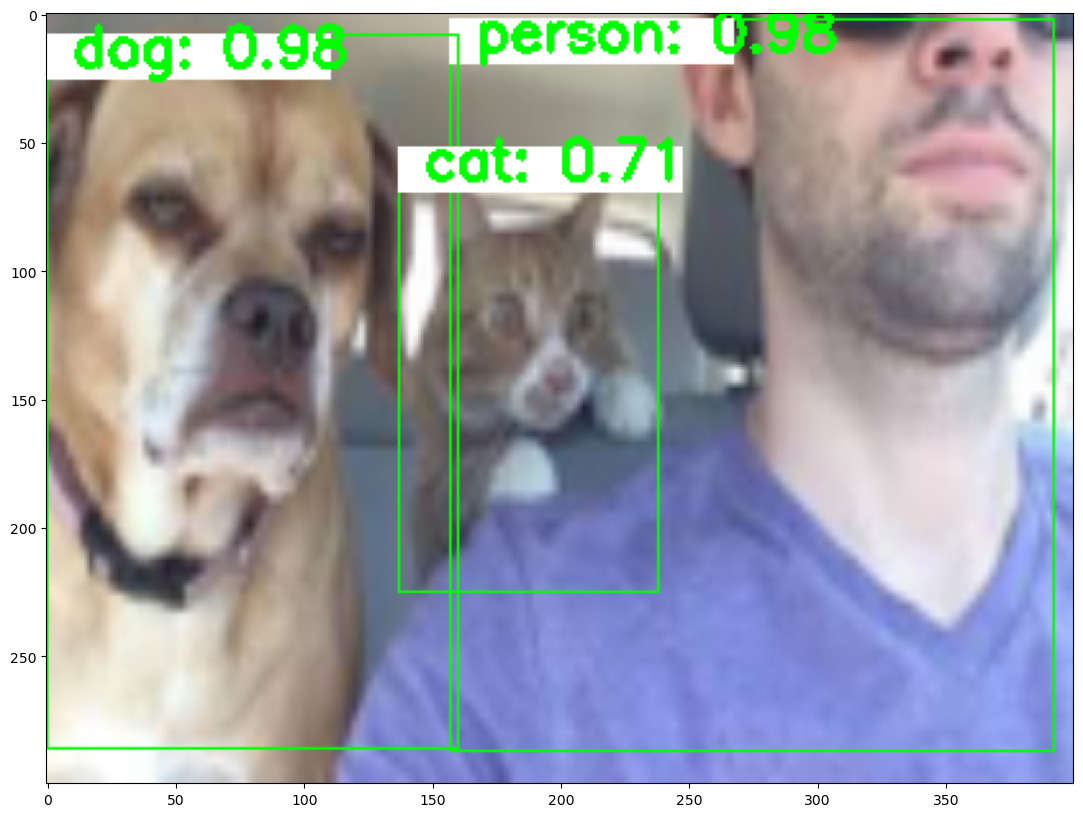


Label: person
Box coordinates: 150, 61, 360, 252
Probability: 0.9958261251449585

Label: dog
Box coordinates: 37, 158, 177, 261
Probability: 0.9796629548072815

Label: dog
Box coordinates: 47, 154, 349, 264
Probability: 0.829859733581543

Label: banana
Box coordinates: 240, 175, 349, 255
Probability: 0.7047786116600037


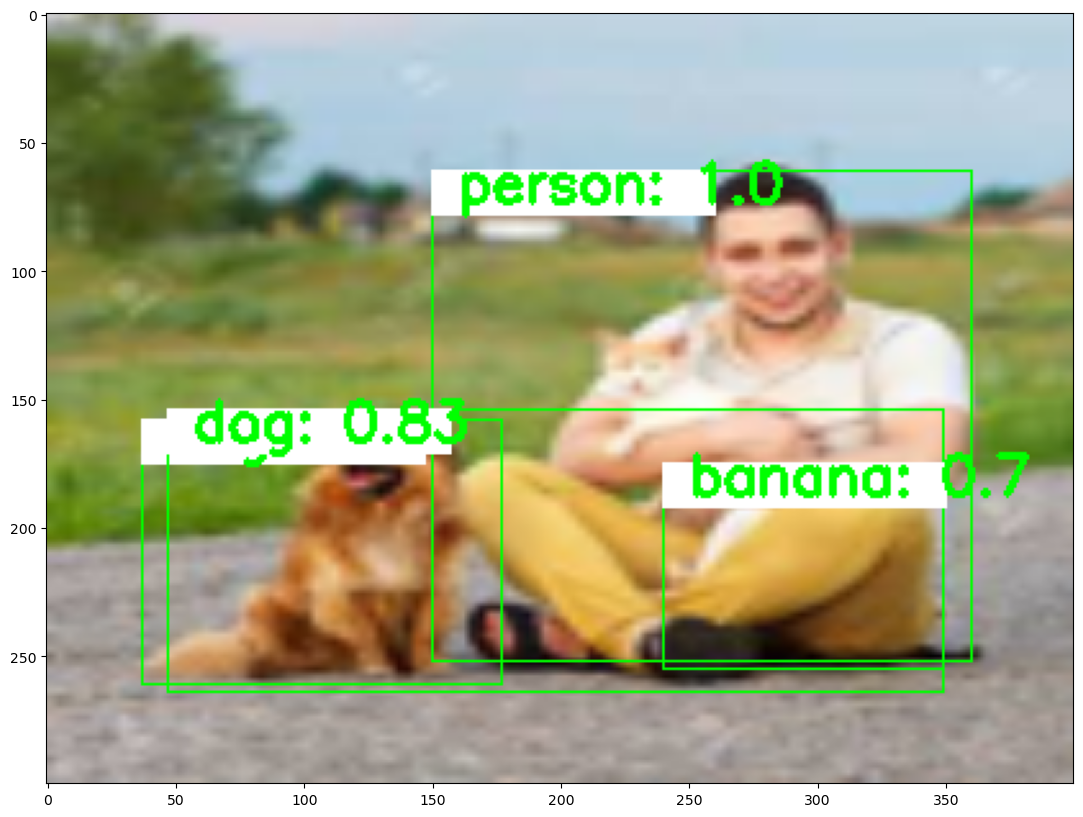


Label: person
Box coordinates: 236, 67, 397, 295
Probability: 0.9273714423179626

Label: tie
Box coordinates: 196, 111, 204, 159
Probability: 0.8419823050498962

Label: tie
Box coordinates: 44, 128, 53, 150
Probability: 0.7629864811897278

Label: person
Box coordinates: 62, 1, 297, 297
Probability: 0.7060402035713196

Label: wine glass
Box coordinates: 166, 5, 231, 176
Probability: 0.6429027318954468

Label: tie
Box coordinates: 119, 237, 130, 270
Probability: 0.6199418902397156


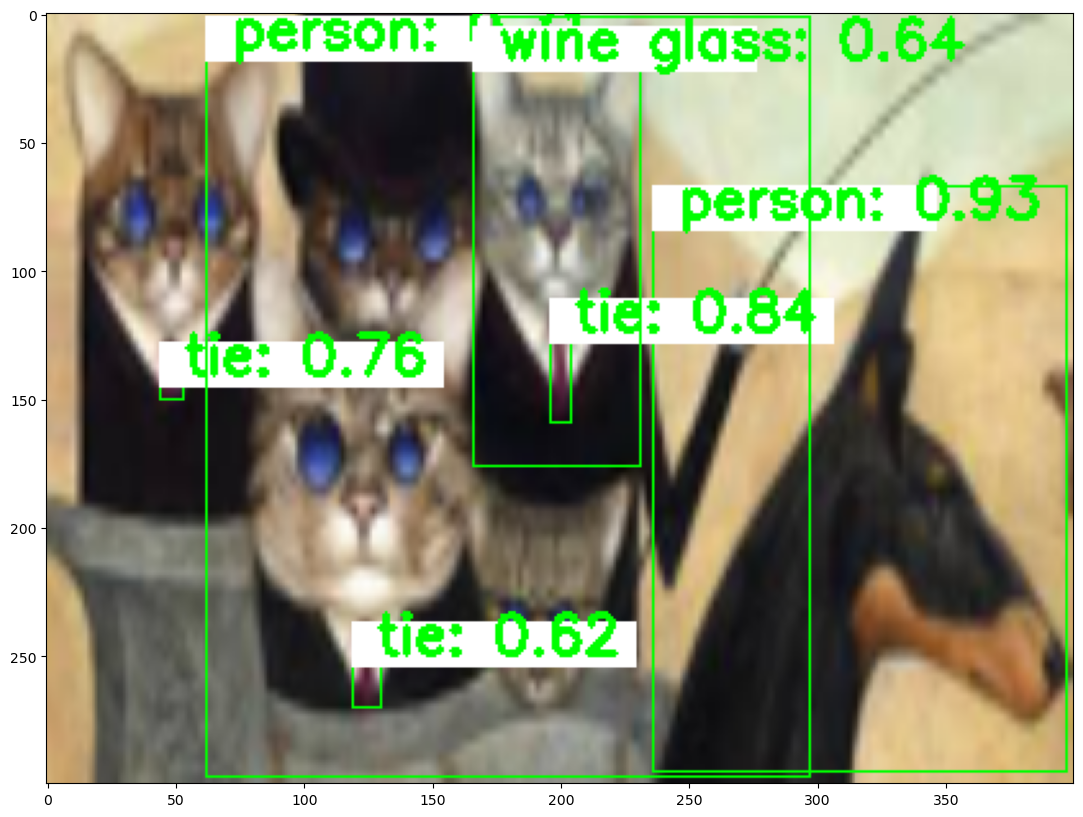


Label: dog
Box coordinates: 38, 169, 107, 296
Probability: 0.974247932434082

Label: cat
Box coordinates: 99, 102, 169, 293
Probability: 0.718579888343811

Label: dog
Box coordinates: 161, 0, 270, 300
Probability: 0.6858891844749451

Label: cat
Box coordinates: 271, 105, 363, 296
Probability: 0.6303681135177612


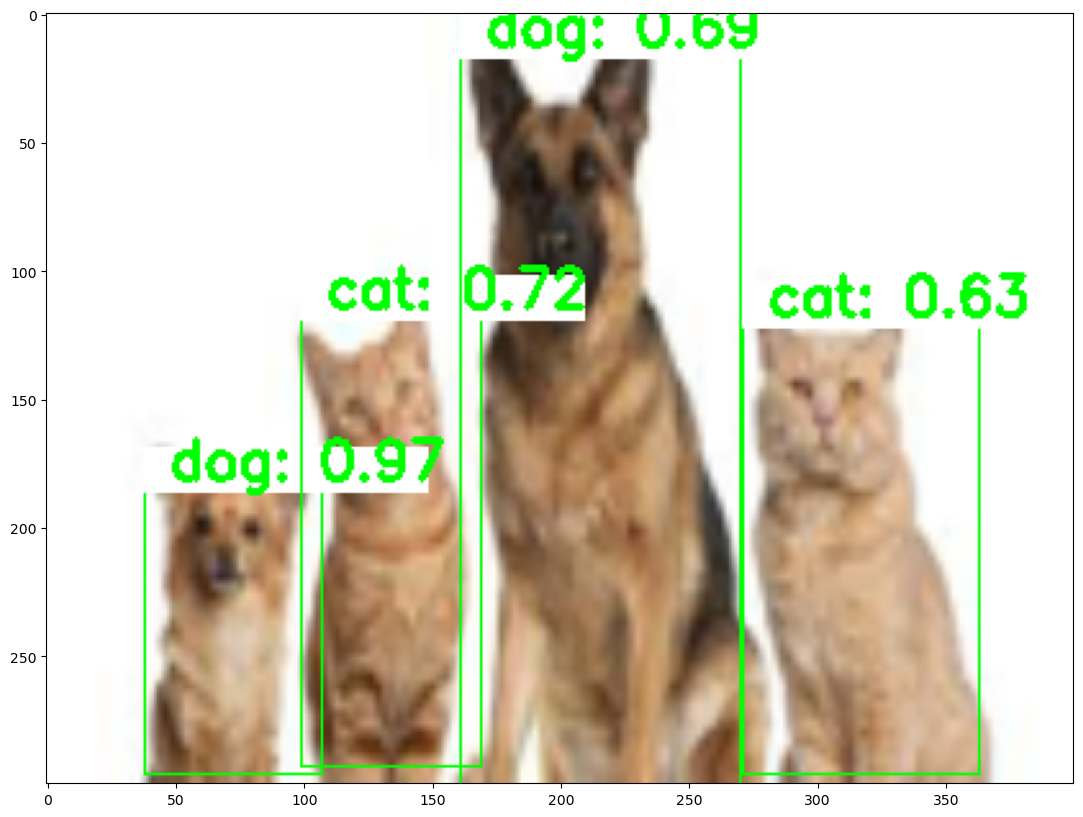

In [15]:
# Function to load and detect objects in new images
def detect_objects_in_new_images():
    # New image paths
    new_image_paths = ['1.jpeg', '2.jpeg', '3.jpeg', '4.jpeg']

    # Define the new dimensions for resizing
    new_height = 300
    new_width = 400

    # Iterate through each new image
    for img_path in new_image_paths:
        # Load image
        image = Image.open(img_path)
        image = image.resize([int(0.5 * s) for s in image.size])

        # Create a transform object to resize and convert the image to a tensor
        transform = transforms.Compose([transforms.Resize((new_height, new_width)), transforms.ToTensor()])
        img = transform(image)

        # Make predictions using the Faster R-CNN model
        pred = model([img])

        # Get predicted classes and draw bounding boxes with adjusted parameters
        pred_class = get_predictions(pred, threshold=0.6)
        draw_box(pred_class, img, rect_th=1, text_size=0.7)

# Run the function to detect objects in new images
detect_objects_in_new_images()